In [1]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import data

#flow
sample_data = pd.DataFrame(pd.read_csv('20230817_KWTITER_001-Batch_Analysis_11042024164452.csv',delimiter=',', usecols=['Specimen Name','Well Name','FITC %Parent']))

#dilution plates
dilution_data_p1_raw = pd.read_csv('Variant titering dilution scheme .csv')

#which dilutions were used for flow
P1_index_raw = pd.read_csv('Variant titering dilution scheme 4_11_24.csv')


In [3]:
#define sample names
P1_Sample_IDs = dilution_data_p1_raw.columns.tolist()


In [4]:
#Set axis on dilution plates
dilution_data_p1_raw.columns = ['1','2','3','4','5','6','7','8','9','10','11','12']
dilution_data_p1_raw.index = ['A','B','C','D','E','F','G','H']

In [5]:
#combine well position, dilution, and sample names and convert in to a list-like format

dilution_data_p1 = pd.DataFrame(columns=['Dilution Used','Dilution','Sample','Specimen Name'])

for i in dilution_data_p1_raw.index:    
    for x,v in zip(dilution_data_p1_raw.columns,P1_Sample_IDs):
        temp_list = [i+x,dilution_data_p1_raw.loc[i,x],v,'Plate 1']
        dilution_data_p1.loc[len(dilution_data_p1)] = temp_list

In [6]:
dilution_data_p1

,Dilution Used,Dilution,Sample,Specimen Name
0,A1,0.500000,pKW144,Plate 1
1,A2,0.500000,pKW194,Plate 1
2,A3,0.500000,pKW195,Plate 1
3,A4,0.500000,pKW196,Plate 1
4,A5,0.500000,pKW197,Plate 1
...,...,...,...,...
91,H8,0.000229,pKW200,Plate 1
92,H9,0.000229,pKW201,Plate 1
93,H10,0.000229,pKW202,Plate 1
94,H11,0.000229,pKW204,Plate 1


In [7]:
#combine dilution schemes for plate 1 and 2
dilution_data_p1
complete_dilution = pd.concat([dilution_data_p1])

In [8]:
#Set axis on the plates indicating which dilutions were used
# P1_index_raw = P1_index_raw.drop(['Unnamed: 0'],axis=1)
P1_index_raw.columns = ['1','2','3','4','5','6','7','8','9','10','11','12']
P1_index_raw.index = ['A','B','C','D','E','F','G','H']


In [9]:
#combine well position, dilution, and sample names and convert in to a list-like format

P1_index = pd.DataFrame(columns=['Well Name','Dilution Used','Specimen Name'])

for i in P1_index_raw.index:
    for x in P1_index_raw.columns:
        temp_list = [i+x, P1_index_raw.loc[i,x],'Plate 1']
        P1_index.loc[len(P1_index)] = temp_list

In [10]:
#combine tables indicatng which dilutions were used for plates 1, 2, and 3
complete_index = pd.concat([P1_index])

In [11]:
#Combine flow data, dilution, and dilution use schemes
merged_sample_data = pd.merge(sample_data,complete_index, on=['Well Name','Specimen Name'], how = 'left')
merged_sample_data = pd.merge(merged_sample_data,complete_dilution, on=['Dilution Used','Specimen Name'], how = 'left')


In [12]:
#Calculate titers using the Poisson formula. 
#If P is the percentage of cells that are ZsGreen positive, then the titer per ml is: -ln(1 − P/100) × (number of cells/well)/(volume of virus per well in mL)
#volume of virus per well well = (150 µL * dilution) = 0.15 mL * dilution

cells_counted = 81150
merged_sample_data['transduction units per mL'] = -np.log(1-(merged_sample_data['FITC %Parent']/100))*(cells_counted/(0.15*merged_sample_data['Dilution']))

In [39]:
#drop samples that had less than 1% or more than 10% FITC stained cells 
filtered_sample_data = merged_sample_data[(merged_sample_data['FITC %Parent'] >= 1) & (merged_sample_data['FITC %Parent'] <= 10)]                                    

In [40]:
filtered_sample_data

,Specimen Name,Well Name,FITC %Parent,Dilution Used,Dilution,Sample,transduction units per mL
8,Plate 1,B1,1.5,B1,0.166667,pKW144,49058.858520
9,Plate 1,B2,2.0,B2,0.166667,pKW194,65577.974837
10,Plate 1,B3,1.4,B3,0.166667,pKW195,45765.099383
11,Plate 1,B4,2.5,B4,0.166667,pKW196,82181.588281
12,Plate 1,B5,2.0,B5,0.166667,pKW197,65577.974837
13,Plate 1,B6,1.6,B6,0.166667,pKW198,52355.963273
14,Plate 1,B7,3.1,B7,0.166667,pKW199,102218.684935
15,Plate 1,B8,2.7,B8,0.166667,pKW200,88846.887031
32,Plate 1,E1,9.2,A1,0.500000,pKW144,104424.794212
37,Plate 1,E6,10.0,A6,0.500000,pKW198,114000.077942


In [41]:
#Add a column to indicate if spike production was induced (true) or vsvg (false)

filtered_sample_data['induction'] = filtered_sample_data['Specimen Name'] == "Plate 1"


/var/folders/sv/w2n5lcb57zz70hk1l6tkkkf00000gp/T/ipykernel_41012/2889561959.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_sample_data['induction'] = filtered_sample_data['Specimen Name'] == "Plate 1"


In [42]:
filtered_sample_data

,Specimen Name,Well Name,FITC %Parent,Dilution Used,Dilution,Sample,transduction units per mL,induction
8,Plate 1,B1,1.5,B1,0.166667,pKW144,49058.858520,True
9,Plate 1,B2,2.0,B2,0.166667,pKW194,65577.974837,True
10,Plate 1,B3,1.4,B3,0.166667,pKW195,45765.099383,True
11,Plate 1,B4,2.5,B4,0.166667,pKW196,82181.588281,True
12,Plate 1,B5,2.0,B5,0.166667,pKW197,65577.974837,True
13,Plate 1,B6,1.6,B6,0.166667,pKW198,52355.963273,True
14,Plate 1,B7,3.1,B7,0.166667,pKW199,102218.684935,True
15,Plate 1,B8,2.7,B8,0.166667,pKW200,88846.887031,True
32,Plate 1,E1,9.2,A1,0.500000,pKW144,104424.794212,True
37,Plate 1,E6,10.0,A6,0.500000,pKW198,114000.077942,True


In [43]:
#Calculate mean and SEM for each sample
mean = (filtered_sample_data.groupby(['Sample','induction'], as_index=False)['transduction units per mL'].mean()).rename(columns={'transduction units per mL': 'Mean transduction units per mL'})
std = (filtered_sample_data.groupby(['Sample','induction'], as_index=False)['transduction units per mL'].std()).rename(columns={'transduction units per mL': "std"})

merged = mean.merge(std, on = ['Sample', 'induction'])

In [44]:
#sorting list
merged = merged.sort_values(by='induction')
merged

,Sample,induction,Mean transduction units per mL,std
0,pKW144,True,66416.250705,32957.537028
1,pKW194,True,68893.603519,4689.007050
2,pKW195,True,52362.668124,9330.371193
3,pKW196,True,77195.410241,7051.520608
4,pKW197,True,65577.974837,0.000000
5,pKW198,True,71804.966578,36579.205735
6,pKW199,True,95532.785983,9455.288975
7,pKW200,True,82188.417485,9416.497936
8,pKW201,True,100044.388590,2510.661160
9,pKW202,True,94084.395605,7440.291545


In [45]:
merged

,Sample,induction,Mean transduction units per mL,std
0,pKW144,True,66416.250705,32957.537028
1,pKW194,True,68893.603519,4689.007050
2,pKW195,True,52362.668124,9330.371193
3,pKW196,True,77195.410241,7051.520608
4,pKW197,True,65577.974837,0.000000
5,pKW198,True,71804.966578,36579.205735
6,pKW199,True,95532.785983,9455.288975
7,pKW200,True,82188.417485,9416.497936
8,pKW201,True,100044.388590,2510.661160
9,pKW202,True,94084.395605,7440.291545


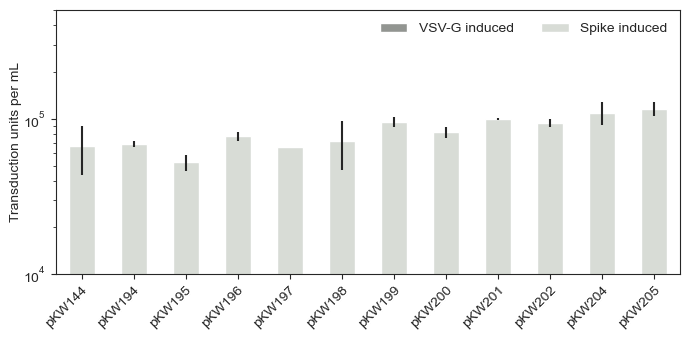

In [46]:
#import some extra plotting functions
from matplotlib.patches import Patch
import matplotlib as mpl
import matplotlib.lines as lines
import matplotlib.colors as mcolors

#define some stuff for plotting
axes_titles = merged.Sample.unique().tolist() #set sample names for plot
x_len = np.arange(len(axes_titles)) #generate an iterable for # of samples
bar_width = 0.2

# Create subplots
#pick some colors
VSV_color = '#929591'
spike_color = '#d8dcd6'

#prepare std for plotting
merged['plot_std'] = merged['std'] * np.log(2)

# Set figure size
fig, ax = plt.subplots(figsize=(7, 3.5))  # Adjust the dimensions as desired

# Plot bar chart
merged.plot(kind='bar', x='Sample', y='Mean transduction units per mL', yerr='plot_std', color=merged['induction'].map({True: spike_color, False: VSV_color}), legend=False, ax=ax)
ax.set_yscale('log')
plt.ylim(1e4, 5e5)
sns.set_style("ticks")

# Set labels and title
plt.xlabel('')
plt.ylabel('Transduction units per mL', labelpad=0.5, fontsize=10)
plt.yticks(fontsize=10)
plt.title('')
plt.xticks(fontsize=10, rotation=45, ha='right', rotation_mode="anchor")

legend_elements = [Patch(facecolor=VSV_color, label='VSV-G induced'),
                   Patch(facecolor=spike_color, label='Spike induced')]
plt.legend(handles=legend_elements, fontsize=10, loc='upper right', ncol=4, frameon=False)

# Show the plot
plt.tight_layout()
#plt.savefig('titering Ace2.pdf')

In [47]:
merged

,Sample,induction,Mean transduction units per mL,std,plot_std
0,pKW144,True,66416.250705,32957.537028,22844.423869
1,pKW194,True,68893.603519,4689.007050,3250.172016
2,pKW195,True,52362.668124,9330.371193,6467.320486
3,pKW196,True,77195.410241,7051.520608,4887.741628
4,pKW197,True,65577.974837,0.000000,0.000000
5,pKW198,True,71804.966578,36579.205735,25354.773322
6,pKW199,True,95532.785983,9455.288975,6553.906894
7,pKW200,True,82188.417485,9416.497936,6527.018995
8,pKW201,True,100044.388590,2510.661160,1740.257704
9,pKW202,True,94084.395605,7440.291545,5157.217107
